In [14]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [15]:
# Load data

# load local boundary
mosa_london_json = gpd.read_file('./MSOA_London.json')
# mosa_london_json.head(2)
london_msoa = mosa_london_json.to_crs(epsg=27700)
# london_msoa.crs


# load tube line
london_tube_json = gpd.read_file('./london_tube.json')
# london_tube_json.head(2)
london_tube = london_tube_json.to_crs(epsg=27700)
# london_tube.crs

In [16]:
# Make buffer zone

# select the Jubilee line
line_Jubilee = london_tube.query("Line_name=='Jubilee'")

# get the buffer area
buffer_Jubilee = line_Jubilee.buffer(1000)
buffer_Jubilee = gpd.GeoDataFrame(geometry=buffer_Jubilee)

In [17]:
# spatial join to find intersected or contained MSOAs
london_Jubilee_msoa_area = london_msoa.sjoin(buffer_Jubilee, how="left", op="intersects")
london_Jubilee_msoa_area = london_Jubilee_msoa_area.dropna().reset_index(drop=True)
london_Jubilee_msoa_area = london_Jubilee_msoa_area.rename(columns={'MSOA01CD': 'MSOA_CODE'})
london_Jubilee_msoa_area = london_Jubilee_msoa_area.drop(['UserID', 'index_right'], axis=1)
london_Jubilee_msoa_area.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MSOA_CODE  120 non-null    object  
 1   MSOA01NM   120 non-null    object  
 2   MSOA01NMW  120 non-null    object  
 3   geometry   120 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 3.9+ KB


C:\Users\29425\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3505: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


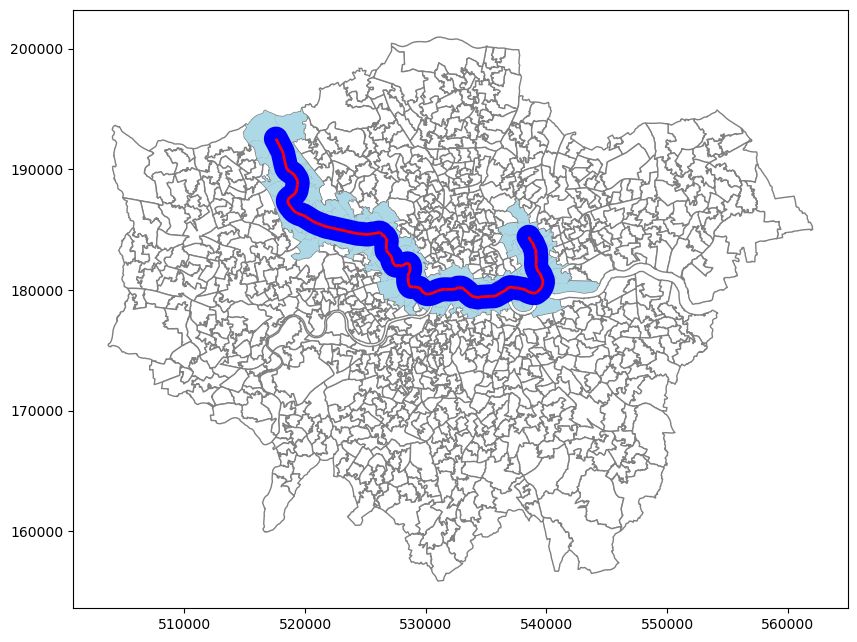

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
london_msoa.plot(ax=ax, color='white', edgecolor='grey')
london_Jubilee_msoa_area.plot(ax=ax, color='lightblue')
line_Jubilee.plot(ax=ax, color='red', linewidth=2)
buffer_Jubilee.plot(ax=ax, color='blue')
plt.show()

In [19]:
# Get lookup table
csv_housing_price = pd.read_csv('./houseprice_msoa.csv')

msoa_lookup_table = csv_housing_price.iloc[:, :4].copy()
msoa_lookup_table = msoa_lookup_table.rename(columns={'Local authority code': 'LA_code',
                                                      'Local authority name': 'LA_name',
                                                      'MSOA code': 'MSOA_code',
                                                      'MSOA name': 'MSOA_name'})
msoa_lookup_table.head(3)
msoa_lookup_table.to_csv('./msoa_lookup_table.csv', index=False)

In [20]:
csv_pop = pd.read_csv('./pop_02to20_MSOA.csv')
# rename the df
col_rename = {'MSOA11CD': 'MSOA_CODE'}
for year in range(2002, 2021):
    old_col = str(year) + 'pop'
    new_col = 'POP_' + str(year)
    col_rename[old_col] = new_col


csv_pop = csv_pop.rename(columns=col_rename)
csv_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MSOA_CODE  951 non-null    object
 1   POP_2002   951 non-null    int64 
 2   POP_2003   951 non-null    int64 
 3   POP_2004   951 non-null    int64 
 4   POP_2005   951 non-null    int64 
 5   POP_2006   951 non-null    int64 
 6   POP_2007   951 non-null    int64 
 7   POP_2008   951 non-null    int64 
 8   POP_2009   951 non-null    int64 
 9   POP_2010   951 non-null    int64 
 10  POP_2011   951 non-null    int64 
 11  POP_2012   951 non-null    int64 
 12  POP_2013   951 non-null    int64 
 13  POP_2014   951 non-null    int64 
 14  POP_2015   951 non-null    int64 
 15  POP_2016   951 non-null    int64 
 16  POP_2017   951 non-null    int64 
 17  POP_2018   951 non-null    int64 
 18  POP_2019   951 non-null    int64 
 19  POP_2020   951 non-null    int64 
dtypes: int64(19), object(1)
memory u

In [21]:
csv_housing_price = pd.read_csv('./houseprice_msoa.csv')
csv_housing_price = csv_housing_price.drop(['Local authority code', 'Local authority name', 'MSOA name'], axis=1)
csv_housing_price = csv_housing_price.rename(columns={'MSOA code': 'MSOA_CODE'})
csv_housing_price = csv_housing_price.rename(columns=lambda x: "HP_" + x if x != "MSOA_CODE" else x)
csv_housing_price.head(2)

,MSOA_CODE,HP_1996_mean,HP_1997_mean,HP_1998_mean,HP_1999_mean,HP_2000_mean,HP_2001_mean,HP_2002_mean,HP_2003_mean,HP_2004_mean,...,HP_2013_med,HP_2014_med,HP_2015_med,HP_2016_med,HP_2017_med,HP_2018_med,HP_2019_med,HP_2020_med,HP_2021_med,HP_2022_med
0,E02000001,139049,149155,218424,235669,225851,278993,258048,313896,297974,...,558750,683525,811125,806988,837494,885295,909351,891406,770625,750417
1,E02000002,54649,64713,77199,73062,81633,92993,112618,144921,164416,...,193750,205125,239687,279875,311050,316375,340750,349563,350750,370833


In [22]:
csv_income = pd.read_csv('./income_01to12.csv')
csv_income = csv_income.drop(['MSOA_name', 'Local_authority_code', 'Local_authority_name'], axis=1)
csv_income = csv_income.rename(columns={'MSOA_code': 'MSOA_CODE'})
csv_income = csv_income.rename(columns=lambda x: "INC_" + x if x != "MSOA_CODE" else x)
csv_income = csv_income.rename(columns=lambda x: x[:-3] if x != "MSOA_CODE" else x)

csv_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSOA_CODE        983 non-null    object
 1   INC_Mean_2001    983 non-null    int64 
 2   INC_Mean_2002    983 non-null    int64 
 3   INC_Mean_2003    983 non-null    int64 
 4   INC_Mean_2004    983 non-null    int64 
 5   INC_Mean_2005    983 non-null    int64 
 6   INC_Mean_2006    983 non-null    int64 
 7   INC_Mean_2007    983 non-null    int64 
 8   INC_Mean_2008    983 non-null    int64 
 9   INC_Mean_2009    983 non-null    int64 
 10  INC_Mean_2010    983 non-null    int64 
 11  INC_Mean_2011    983 non-null    int64 
 12  INC_Mean_2012    983 non-null    int64 
 13  INC_Median_2001  983 non-null    int64 
 14  INC_Median_2002  983 non-null    int64 
 15  INC_Median_2003  983 non-null    int64 
 16  INC_Median_2004  983 non-null    int64 
 17  INC_Median_2005  983 non-null    in

In [26]:
data = pd.merge(csv_pop, csv_housing_price, on='MSOA_CODE', how='left')
data = pd.merge(data,csv_income,on='MSOA_CODE', how='left') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 98 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSOA_CODE        951 non-null    object
 1   POP_2002         951 non-null    int64 
 2   POP_2003         951 non-null    int64 
 3   POP_2004         951 non-null    int64 
 4   POP_2005         951 non-null    int64 
 5   POP_2006         951 non-null    int64 
 6   POP_2007         951 non-null    int64 
 7   POP_2008         951 non-null    int64 
 8   POP_2009         951 non-null    int64 
 9   POP_2010         951 non-null    int64 
 10  POP_2011         951 non-null    int64 
 11  POP_2012         951 non-null    int64 
 12  POP_2013         951 non-null    int64 
 13  POP_2014         951 non-null    int64 
 14  POP_2015         951 non-null    int64 
 15  POP_2016         951 non-null    int64 
 16  POP_2017         951 non-null    int64 
 17  POP_2018         951 non-null    in

In [24]:
london_Jubilee_msoa_area_data = pd.merge(london_Jubilee_msoa_area, data, on='MSOA_CODE', how='left')
london_Jubilee_msoa_area_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 120 entries, 0 to 119
Columns: 101 entries, MSOA_CODE to INC_Median_2012
dtypes: float64(97), geometry(1), object(3)
memory usage: 94.8+ KB


In [25]:
# save the Part 2 data

# Get the MSOA data
london_Jubilee_msoa_area_data_output = london_Jubilee_msoa_area_data.to_crs(epsg='4326')
london_Jubilee_msoa_area_data_output.to_file('london_Jubilee_msoa_area_data.geojson', driver='GeoJSON')

# Get the buffer data
buffer_Jubilee_output = buffer_Jubilee.to_crs(epsg='4326')
buffer_Jubilee_output.to_file('buffer_Jubilee_1km.geojson', driver='GeoJSON')